In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
june = session.query(Measurement.date, Measurement.tobs).where(extract('month', Measurement.date) == 6)



In [5]:
# 2. Convert the June temperatures to a list.
june_temp = session.query(Measurement.date, Measurement.tobs).\
where(extract('month', Measurement.date) == 6).all()

june_temp


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns = ["Date","June Temps"])
june_temp_df.head()

,Date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics
# it matches

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date, Measurement.tobs).where(extract('month', Measurement.date) == 12)

In [10]:
# 7. Convert the December temperatures to a list.
december = list(december)

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december, columns=["Date", "December Temps"])
december_temp_df.head()

,Date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics
# matches

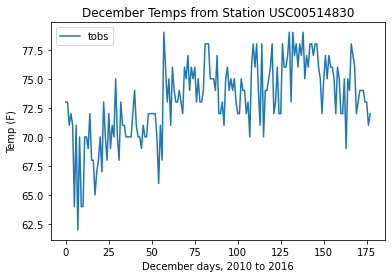

In [14]:
# Graphs for Deliverable 3

decembers_stn_USC00514830 = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
where(extract('month', Measurement.date) == 12).\
filter(Measurement.station == 'USC00514830').all())

decembers_stn_USC00514830.plot(title="December Temps from Station USC00514830",
                              xlabel = 'December days, 2010 to 2016',
                              ylabel = 'Temp (F)'
                              ).get_figure().savefig("december_temps")



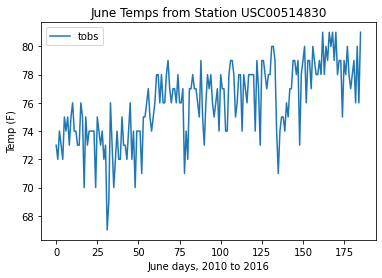

In [16]:
june_stn_USC00514830 = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
where(extract('month', Measurement.date) == 6).\
filter(Measurement.station == 'USC00514830').all())

june_stn_USC00514830.plot(title="June Temps from Station USC00514830",
                              xlabel = 'June days, 2010 to 2016',
                              ylabel = 'Temp (F)'
                              ).get_figure().savefig("june_temps")